# Dataset Shift
## Implementing logistic regression on kmer data
### 7/13/2020 Code clean up

### Load libraries:

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
import sklearn

## The data: even split

### Load training sets 

In [42]:
# 10239 = virus
virus_train = pd.read_csv('outputfile_10239_train_10ksplit.csv', header=None)

# 2157 = archaea
#archaea_train = pd.read_csv('Kmer Data/Train even split/outputfile_2157_train_10ksplit.csv', header=None)

# 2759 = eukaryote
#eukaryote_train = pd.read_csv('Kmer Data/Train even split/outputfile_2759_train_10ksplit.csv', header=None)

# 2 = bacteria
bacteria_train = pd.read_csv('outputfile_2_train_10ksplit.csv', header=None)

### Load test sets

In [43]:
# 10239 = virus
virus_test = pd.read_csv('outputfile_10239_test_10ksplit.csv', header=None)

# 2157 = archaea
#archaea_test = pd.read_csv('Kmer Data/Test even split/outputfile_2157_test_10ksplit.csv', header=None)

# 2759 = eukaryote
#eukaryote_test = pd.read_csv('Kmer Data/Test even split/outputfile_2759_test_10ksplit.csv', header=None)

# 2 = bacteria
bacteria_test = pd.read_csv('outputfile_2_test_10ksplit.csv', header=None)

In [44]:
virus_train.head(4)

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
0,tid|1247113|NC_019027.1|pos|555..5555,0.923856,0.744270,0.950885,0.776531,1.218364,0.603688,0.525217,-0.881697,0.603688,...,0.322276,-0.034399,-0.476232,-0.533390,-0.322081,-0.275561,-1.757166,-1.064018,-0.188550,-0.968708
1,tid|1007869|NC_021347.1|pos|16460..21460,-2.908672,-2.215525,-4.216956,-1.116912,-0.711447,-0.510777,-0.606087,0.135851,-2.908672,...,0.646676,1.381788,0.525315,1.579965,1.613117,1.623928,1.422061,0.458624,1.134379,1.098661
2,tid|1147146|NC_019723.1|pos|32665..37665,1.051232,0.302822,0.767127,0.723325,0.450458,0.044993,-0.015632,-0.080171,0.836120,...,-0.080171,-1.083473,-0.536929,-0.114072,-0.390325,-0.842311,-0.648155,-1.284143,-0.916419,-0.842311
3,tid|1236000|NC_020204.1|pos|13189..18189,0.574149,0.405527,0.733214,0.320369,0.804166,0.464950,0.297896,0.320369,0.405527,...,0.483998,0.097225,-3.486294,-0.395251,0.124624,-0.350799,-0.713705,-0.713705,-0.085096,-1.406852


In [45]:
virus_test.head(4)

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
0,tid|1193422|NC_017979.1|pos|3853..8853,1.151937,0.821273,0.821273,0.861013,0.577651,0.230780,0.230780,0.206087,0.560259,...,0.128126,-0.115496,-0.649579,0.128126,-0.438270,-0.150588,-1.873354,-1.180207,-0.438270,-1.084897
1,tid|10632|NC_001699.1|pos|127..5127,2.281440,1.172778,1.425774,1.608096,1.273582,0.767313,1.008475,-3.016877,0.972107,...,0.384320,-0.308827,-0.531970,0.161177,0.509484,0.118617,-4.325161,-0.819652,-0.244288,-0.183664
2,tid|12274|NC_003615.1|pos|987..5987,1.039521,0.161803,0.661759,0.799380,0.312085,0.077245,0.357547,-0.615902,0.422086,...,0.016621,-0.810058,-1.051220,0.106233,0.047392,-0.116911,-1.369674,-0.741065,-0.558744,-1.051220
3,tid|1087108|NC_016074.1|pos|40..5040,0.748130,0.137221,0.260835,0.328276,0.391455,0.306298,-0.555926,-0.792315,0.083154,...,0.110553,0.328276,-1.197780,-0.066378,0.411658,0.411658,-0.667152,-0.504633,0.610509,-0.667152


In [46]:
# taking virus and bacteria as first pass examples
bacteria_test.head(4)


,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
0,tid|129961|NZ_KV878783.1|pos|4907764..4912764,0.266276,0.509222,0.160915,-0.203728,0.103757,0.509222,0.103757,0.160915,-0.055308,...,-0.244550,0.103757,0.566380,-0.055308,0.266276,0.946844,-0.287110,-2.323991,-0.126767,0.073904
1,tid|1291556|NZ_PVNG01000048.1|pos|13312..18312,-3.039127,-1.247367,-1.429689,-0.959685,0.096368,-0.094688,-0.266538,0.328169,-4.347627,...,0.544392,1.342900,0.649753,1.135261,0.986225,1.367593,1.304679,-0.554220,0.698543,1.180381
2,tid|1191523|NC_018178.1|pos|420787..425787,1.682109,0.626847,1.502316,1.038354,0.230432,0.308393,-0.048282,0.662565,0.896180,...,0.426176,-0.335964,-1.183262,0.257100,-0.384754,-0.335964,-0.161610,-1.588727,-0.436047,-1.771048
3,tid|1247867|NZ_FWFX01000007.1|pos|92787..97787,0.451080,0.293451,0.341079,0.408520,0.106239,0.386541,-0.018924,0.386541,-0.529750,...,0.317548,0.451080,0.163398,-0.052826,0.471699,0.707013,0.217465,-1.222897,-0.018924,0.451080


In [47]:
bacteria_train.head(4)

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
0,tid|1310670|NZ_JEXS01000008.1|pos|102961..107961,1.477226,0.791683,1.446215,0.984055,0.645080,0.067764,0.919516,0.493849,1.293376,...,0.185547,-0.306929,-1.606212,-0.306929,0.098536,-0.564758,-0.689922,-0.507600,-0.402239,-1.606212
1,tid|1100828|NZ_KZ303840.1|pos|418339..423339,-4.064565,-1.147005,-4.064565,-2.756443,-0.271537,0.133929,0.076770,0.677544,-4.064565,...,1.114758,1.613005,0.709293,1.506237,0.981226,2.031049,1.286608,0.016146,1.463065,1.506237
2,tid|1249621|NZ_ANKP01000254.1|pos|20243..25243,-1.797869,-0.139641,-0.619214,-0.786268,-0.006109,0.111674,-1.104722,0.504716,-0.699257,...,0.342197,0.876280,0.504716,0.644478,1.197863,1.119902,1.400804,-0.699257,0.479398,0.926711
3,tid|1005518|NZ_AKLW01000071.1|pos|203..5203,-0.194704,0.161971,-0.092922,0.424335,0.234291,0.516143,0.056610,0.056610,-0.435866,...,0.257281,0.210761,-1.329684,0.028439,0.110677,0.110677,-0.754320,-0.636537,-0.000548,-0.435866


### Remove the first column from each data set

In [48]:
virus_train = virus_train.drop([0], axis = 1)
virus_test = virus_test.drop([0], axis = 1)

bacteria_train = bacteria_train.drop([0], axis = 1)
bacteria_test = bacteria_test.drop([0], axis = 1)

#eukaryote_train = eukaryote_train.drop([0], axis = 1)
#eukaryote_test = eukaryote_test.drop([0], axis = 1)

#archaea_train = archaea_train.drop([0], axis = 1)
#archaea_test = archaea_test.drop([0], axis = 1)


In [53]:
# quick visual confirm
bacteria_test.head(3)

# successfully removed the first column

,1,2,3,4,5,6,7,8,9,10,...,127,128,129,130,131,132,133,134,135,136
0,0.266276,0.509222,0.160915,-0.203728,0.103757,0.509222,0.103757,0.160915,-0.055308,0.469217,...,-0.244550,0.103757,0.566380,-0.055308,0.266276,0.946844,-0.287110,-2.323991,-0.126767,0.073904
1,-3.039127,-1.247367,-1.429689,-0.959685,0.096368,-0.094688,-0.266538,0.328169,-4.347627,-0.959685,...,0.544392,1.342900,0.649753,1.135261,0.986225,1.367593,1.304679,-0.554220,0.698543,1.180381
2,1.682109,0.626847,1.502316,1.038354,0.230432,0.308393,-0.048282,0.662565,0.896180,1.062165,...,0.426176,-0.335964,-1.183262,0.257100,-0.384754,-0.335964,-0.161610,-1.588727,-0.436047,-1.771048


In [50]:
virus_test.describe()

,1,2,3,4,5,6,7,8,9,10,...,127,128,129,130,131,132,133,134,135,136
count,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,...,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000
mean,0.690509,0.462850,0.502993,0.536703,0.598076,0.309945,0.364149,-0.109253,0.266177,0.319065,...,0.279391,-0.047368,-1.100607,-0.013944,-0.055836,-0.384030,-1.409690,-0.715855,-0.203151,-1.321033
std,0.962970,0.548283,0.940678,0.613724,0.426655,0.272487,0.490833,0.695189,0.954594,0.588165,...,0.339419,0.548357,1.140841,0.513201,0.448040,0.949714,1.394965,0.500410,0.652111,1.413436
min,-4.680319,-2.501494,-4.160824,-2.223106,-1.544223,-1.167070,-1.544223,-4.415136,-4.511126,-4.231728,...,-0.694762,-2.934649,-4.756667,-1.590454,-2.083291,-4.416759,-4.689750,-2.757709,-2.284142,-4.758439
25%,0.203977,0.167541,0.086959,0.275086,0.329228,0.149135,0.033441,-0.479573,-0.249895,-0.010224,...,0.035802,-0.388233,-1.313533,-0.312271,-0.369149,-0.942597,-2.184850,-0.999656,-0.618043,-2.024367
50%,0.786237,0.513475,0.577759,0.593001,0.600820,0.296540,0.389595,0.069304,0.383010,0.431130,...,0.266474,-0.065067,-0.813454,-0.027865,-0.014863,-0.418524,-1.188133,-0.748871,-0.185315,-1.009700
75%,1.296737,0.823681,1.134223,0.916507,0.870866,0.478158,0.723837,0.361015,0.842620,0.680238,...,0.500903,0.277808,-0.406336,0.231237,0.251660,0.298140,-0.494342,-0.405844,0.167522,-0.396624
max,2.764825,1.630281,2.684958,1.921679,1.625861,2.333396,1.578393,0.948130,2.473476,1.777087,...,1.346306,1.813794,0.613177,1.900460,1.689340,2.699499,2.381045,1.094319,2.011000,1.952631


# Visualize with histograms

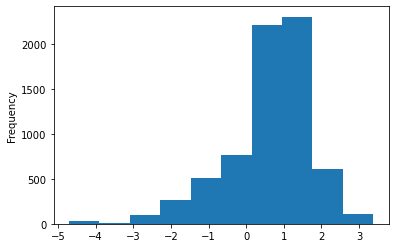

In [54]:
virus_train[1].plot.hist() 
# [1] indexes on the first column

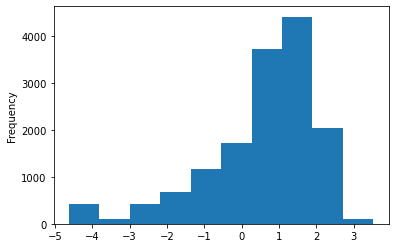

In [55]:
bacteria_train[1].plot.hist()

In [56]:
#eukaryote_train[1].plot.hist()

In [57]:
#archaea_train[1].plot.hist()

# Data Wrangling and Preprocessing

Required modules

In [60]:
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import preprocessing 

# https://scikit-learn.org/stable/modules/preprocessing.html
#  transform the data to center it by removing the mean value (set mean = 0) 
# of each feature, then scale it by dividing non-constant features by their standard deviation.

Define the independent and dependent variables: Train set

In [61]:
#### starting with virus and bacteria ####
# we already have our train and test sets separated

# Append the training data sets together
# Binary variable 0 = bacteria; 1 = virus

X_train = virus_train.append(bacteria_train)
X_train

,1,2,3,4,5,6,7,8,9,10,...,127,128,129,130,131,132,133,134,135,136
0,0.923856,0.744270,0.950885,0.776531,1.218364,0.603688,0.525217,-0.881697,0.603688,0.346969,...,0.322276,-0.034399,-0.476232,-0.533390,-0.322081,-0.275561,-1.757166,-1.064018,-0.188550,-0.968708
1,-2.908672,-2.215525,-4.216956,-1.116912,-0.711447,-0.510777,-0.606087,0.135851,-2.908672,-1.299234,...,0.646676,1.381788,0.525315,1.579965,1.613117,1.623928,1.422061,0.458624,1.134379,1.098661
2,1.051232,0.302822,0.767127,0.723325,0.450458,0.044993,-0.015632,-0.080171,0.836120,0.389833,...,-0.080171,-1.083473,-0.536929,-0.114072,-0.390325,-0.842311,-0.648155,-1.284143,-0.916419,-0.842311
3,0.574149,0.405527,0.733214,0.320369,0.804166,0.464950,0.297896,0.320369,0.405527,0.124624,...,0.483998,0.097225,-3.486294,-0.395251,0.124624,-0.350799,-0.713705,-0.713705,-0.085096,-1.406852
4,1.264798,0.909457,1.319357,0.922702,0.766356,0.442117,0.652412,-0.075826,0.868635,0.280848,...,0.229555,-0.412299,-1.105446,-0.699981,-0.463592,-1.010136,-1.105446,-0.574818,-0.363509,-2.309419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14730,0.379740,-0.242789,-0.561243,-0.037995,0.131904,-0.037995,-0.443460,0.221516,-0.768882,-0.155778,...,0.329730,0.691520,0.192529,0.427369,0.760513,1.009974,0.983657,-0.935936,-0.114956,0.983657
14731,1.189172,0.533066,0.759839,0.496024,0.163319,-0.216171,0.052093,0.636606,0.759839,0.163319,...,-0.529829,-0.106972,-0.701679,-0.529829,-0.338773,0.163319,0.214612,-0.835210,-0.106972,-0.701679
14732,0.637630,0.290759,0.240749,0.620239,-0.021615,0.361377,-0.287318,0.736070,0.132535,0.405829,...,0.073695,-0.021615,-0.287318,0.042923,-0.378290,0.160706,0.704322,-1.024917,-0.287318,-0.532441
14733,-0.856506,-0.045576,-0.738723,-0.451041,-0.538052,0.590413,-0.856506,0.396257,-1.144188,-0.370998,...,0.647571,0.935253,1.053036,0.914200,1.298159,1.834737,1.834737,-2.935948,0.242106,1.458502


In [62]:
# y variable: for all observations in virus_train dataset, make one dimension of "1" = a column of 1s
# the length of the virus_train dataset
y_train = [1 for x in range(virus_train.shape[0])]

# repeat for bacteria and extend y with the new values
y_train.extend([0 for x in range(bacteria_train.shape[0])])


Now we have y_train and X_train datasets 

Define the independent and dependent variables: Test set

In [63]:
X_test = virus_test.append(bacteria_test)
y_test = [1 for x in range(virus_test.shape[0])]
y_test.extend([0 for x in range(bacteria_test.shape[0])])

In [64]:
#Add labels to df
X_train['label'] = pd.Series(y_train)
X_test['label'] = pd.Series(y_test)

# shuffle the rows
X_train = X_train.sample(frac=1, random_state=5695)
X_test = X_test.sample(frac=1, random_state=5695)

#split labels off

test_label = X_test['label']
train_label = X_train['label']
X_test.drop(['label'], axis=1)
X_train.drop(['label'], axis=1)

,1,2,3,4,5,6,7,8,9,10,...,127,128,129,130,131,132,133,134,135,136
13154,1.050541,0.645076,0.894537,0.709615,0.645076,0.462754,0.214293,0.134250,0.813411,0.645076,...,0.134250,-1.146683,-0.884319,-0.048071,-0.404746,-0.081973,-0.676680,-0.884319,-1.252044,-1.146683
8225,-0.603388,-0.367000,-0.672381,-0.538850,-0.092563,0.272080,-0.538850,0.538709,-1.008853,0.020766,...,0.766099,0.731613,0.402133,0.538709,0.815696,1.019295,0.937057,-1.008853,0.426231,0.713913
211,0.877972,0.389125,0.410631,0.530776,-0.304022,0.274056,0.026220,0.452304,0.344673,0.410631,...,0.086844,0.530776,-0.072220,0.144003,-0.261462,0.344673,0.734871,-0.606303,-0.220640,-0.261462
8353,1.050888,0.667163,0.617566,0.565381,0.617566,0.301229,-0.164134,0.491273,0.390176,0.277698,...,0.253601,0.203590,-0.626758,-0.569599,0.203590,-0.241095,0.301229,-1.062076,-0.201875,-1.850533
10715,0.768771,0.446687,0.446687,0.446687,0.446687,0.426485,-0.469603,0.272334,0.446687,0.000400,...,0.061025,0.031172,-0.632122,0.198226,0.145582,0.198226,0.248236,-1.067440,-0.632122,-0.692747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14656,-1.634684,-1.634684,-2.327831,-1.922366,0.023544,-0.248389,-0.718393,0.237118,-3.020978,-0.718393,...,0.692594,1.255688,0.850223,1.553733,0.910847,1.213128,0.785684,-0.823754,0.986355,0.930266
18,1.815390,0.944562,1.519926,1.098712,0.930575,-0.154051,0.496537,0.356775,1.377426,0.675229,...,-0.113229,-1.029519,-0.559516,-0.441733,-0.624054,-1.722667,-1.386194,-0.498891,-1.029519,-1.540345
833,-1.572212,-0.530758,-1.572212,-0.185918,-0.228477,-0.031767,0.420218,0.507230,-1.418061,0.162389,...,0.926488,0.661380,0.191377,0.661380,0.324908,0.625013,0.132536,-0.419532,0.486176,-0.655921
9042,0.368974,0.529317,0.253905,0.177919,0.203895,0.411534,0.151251,0.547666,-0.240791,0.472159,...,0.368974,0.229212,-0.281613,0.151251,0.411534,-0.201570,0.278003,-1.157082,-0.463935,-1.061772


Standardize each feature (=column) in the training sets

In [65]:
# Standardize each feature (columns) in the traininng sets

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)

X_test_transformed = scaler.transform(X_test)
type(X_test_transformed)

numpy.ndarray

In [66]:
#combine labels and data shuffle and split


Los variables:

X_train_transformed

X_test_transformed

y_test

y_train

### Using logistic regression to predict taxa by kmer pattern similarity

The modules

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

reshuffle data for the model

## The Logistic Regression execution

In [114]:
logmodel = LogisticRegression(max_iter=100000)

# default set to l2 is ok

In [122]:
logmodel_fit = logmodel.fit(X_train_transformed[1:0], train_label[1:20])

acc = logmodel_fit.score(X_test_transformed, test_label)
print("accruacy: {}".format(acc))

accruacy: 0.820070137577556


Check the probabilities for the training set

In [123]:
prob_vir_bac = logmodel.predict_proba(X_train_transformed)

In [124]:
print(prob_vir_bac.shape)

prob_df = pd.DataFrame(data=prob_vir_bac,
                          columns=["prob_not_virus", "prob_virus"])


# add y_train to this df
prob_df['Group'] = y_train

print(type(prob_df))
prob_df.head()
# X_train_transformed

(21651, 2)
<class 'pandas.core.frame.DataFrame'>


,prob_not_virus,prob_virus,Group
0,0.937909,0.062091,1
1,0.951800,0.048200,1
2,0.140965,0.859035,1
3,0.977744,0.022256,1
4,0.963639,0.036361,1


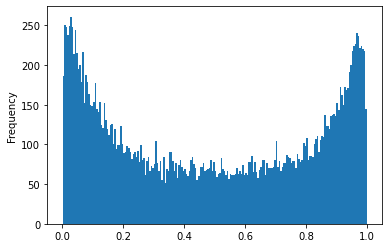

In [125]:
prob_df["prob_not_virus"].plot.hist(bins=200)

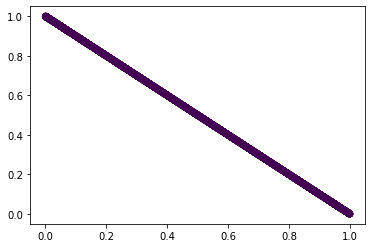

In [126]:
plt.scatter(prob_df.prob_not_virus,
            prob_df.prob_virus,
            c=prob_df.Group)

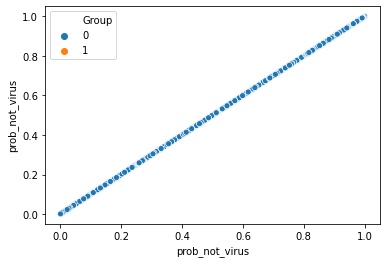

In [127]:
sns.scatterplot(x = prob_df.prob_not_virus, 
                y = prob_df.prob_not_virus,
               hue = prob_df.Group)


#### Now apply our regression model to the test data to see how it performs

In [128]:
predictions = logmodel.predict(X_test_transformed)
print(predictions)

[1 1 0 ... 1 0 0]


In [129]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(test_label, predictions)

array([[1116,  225],
       [ 442, 1924]])

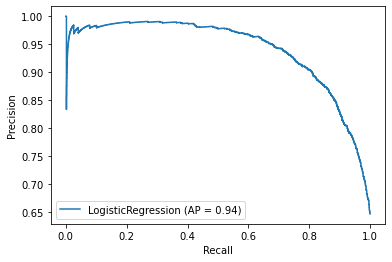

In [138]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt


disp = plot_precision_recall_curve(logmodel, X_test_transformed, test_label)



## Metric: Dummy Classifier

DummyClassifier is a classifier that makes predicitions using simple rules

This classifier is a useful baseline to comapre with real classifiers
and is not to be used on real problems

In [100]:
from sklearn.dummy import DummyClassifier

In [101]:
 X = X_train_transformed
 y = train_label

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X)
dummy_clf.score(X, y)

0.6388619463304236

In [79]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_test_transformed,test_label)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X_test_transformed)
dummy_clf.score(X_test_transformed, test_label)

0.6382519557593742

# Remaining groups in even data set

## The data: uneven split